In [269]:
#prepare data
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#load data
data = pd.read_csv('../data/features_voice.csv', thousands=' ')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [270]:
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.561047,1216.076584,1906.471303,2887.243652,0.033928,-304.606567,105.816933,25.773632,41.385117,0.258171,...,7.865949,0.690734,2.128718,0.424056,1.543995,0.921534,4.874877,0.362699,2.506349,avanza
1,0.395306,1983.098260,1822.039604,3750.260656,0.118997,-167.530045,131.462982,-21.487537,35.344666,-24.315830,...,10.115635,-9.641479,5.068021,-3.818474,6.461788,-3.762234,-6.758687,5.595471,-2.116474,avanza
2,0.552942,1674.140499,1978.852766,3797.674006,0.066895,-254.996353,104.275185,-0.332176,46.231598,-9.514655,...,1.755489,0.726691,2.915375,-2.892290,2.885929,1.222997,5.095343,-0.641144,1.898718,avanza
3,0.563875,1242.391957,1854.850881,2550.761719,0.034505,-287.443970,110.703461,22.979244,43.234928,-0.471837,...,5.450295,0.284010,1.791565,-0.510627,2.871432,0.893678,3.737510,2.009848,2.424776,avanza
4,0.240719,1965.831858,1970.560459,3531.859413,0.091196,-266.288086,113.028061,4.333920,30.092987,-6.586162,...,-4.190058,12.055159,2.667932,3.117420,9.741912,-5.509915,11.676921,-4.757508,-0.882551,avanza


In [271]:
data['label'] = pd.Categorical(data['label'])
data['label'] = data.label.cat.codes

In [272]:
# data.head()
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, [4,2]], dtype = float))

In [273]:
commands_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(commands_list)

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [275]:
def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')

    # highlight test samples
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]

        plt.scatter(x_test[:, 0], x_test[:, 1],
                    c='',
                    edgecolors='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=100,
                    label='test set'
                    )

In [276]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

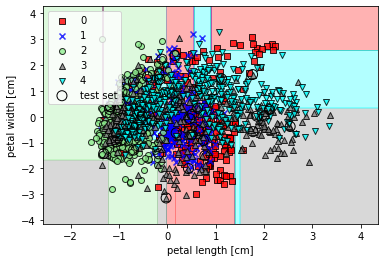

In [277]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, Y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

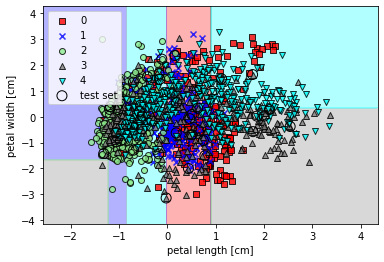

In [280]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

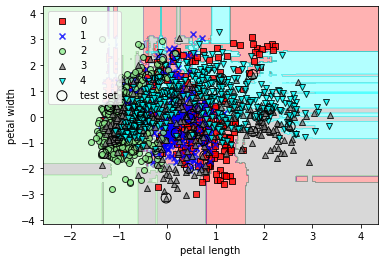

In [281]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()